In [2]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu
import networkx as nx
import matplotlib.pyplot as plt

In [31]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'Black_wf_WholeBrain'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
            if os.path.isdir(os.path.join(data_directory, name))]

In [32]:
# load query file where we added volumes for each area
volumes = ace.clean_volumes_database()

In [38]:
def load_subject(subject, data_directory, threshold, em='both'):
    file_suffix = 'cells_' + str(threshold)
    df_mouse = pd.read_csv(data_directory + subject + '/' + file_suffix + '.csv')
    if em=='both':
        df_mouse = ace.reformat_df_mouse(df=df_mouse)
    elif em=='sx':
        df_mouse = ace.reformat_df_mouse(df=df_mouse[df_mouse[' x']<228].reset_index(drop=True))
    elif em=='dx':
        df_mouse = ace.reformat_df_mouse(df=df_mouse[df_mouse[' x']>228].reset_index(drop=True))
    else:
        return ValueError('em input not valid')
    return df_mouse

# Analysis on Black with father Whole Brain

In [39]:
dict_results_across_mice = {subject: ace.calculate_cells_energy_per_level(df_mouse=load_subject(subject=subject, 
                                                                                               data_directory=data_directory,
                                                                                              threshold=2500,
                                                                                               em='sx'), 
                                                                         vol=volumes, 
                                                                         level=8) for subject in subjects}
np.save('dict_results/dict_results_across_mice_Black_wf_WholeBrain_unfiltered2500_emSX.npy', dict_results_across_mice)

/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/pytho

In [40]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_Black_wf_WholeBrain_unfiltered2500_emSX.npy', 
                                   allow_pickle=True).item()

In [41]:
subjects = list(dict_results_across_mice.keys())

# List areas with null cell count

In [42]:
db_null_count = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells == 0] for subject in subjects}

# List areas with no volume

In [43]:
db_null_volume = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject]['energy'].isnull()] for subject in subjects}

# Divide mice into experimental groups: FAM/UNFAM/CONTROL

In [44]:
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
experimental_groups

{'Control': ['BL53Control', 'BL45Control', 'BL51Control'],
 'Fam': ['BL49Fam', 'BL47Fam', 'BL50Fam'],
 'Unfam': ['BL48Unfam', 'BL54Unfam', 'BL52Unfam', 'BL46Unfam']}

# Calculate cell count across experimental groups

In [45]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [46]:
df_control_cell_count.set_index('area').sum()

BL53Control    39800
BL45Control    50803
BL51Control    84114
dtype: int64

In [47]:
df_fam_cell_count.set_index('area').sum()

BL49Fam    56491
BL47Fam    76222
BL50Fam    61384
dtype: int64

In [48]:
df_unfam_cell_count.set_index('area').sum()

BL48Unfam    68264
BL54Unfam    56405
BL52Unfam    29626
BL46Unfam    32124
dtype: int64

# Look at cell count per area

In [49]:
df_control_cell_count.set_index('area').loc['Medial amygdalar nucleus']

BL53Control    220
BL45Control    305
BL51Control    525
Name: Medial amygdalar nucleus, dtype: int64

In [50]:
df_fam_cell_count.set_index('area').loc['Medial amygdalar nucleus']

BL49Fam     835
BL47Fam    1168
BL50Fam     736
Name: Medial amygdalar nucleus, dtype: int64

In [51]:
df_unfam_cell_count.set_index('area').loc['Medial amygdalar nucleus']

BL48Unfam    613
BL54Unfam    578
BL52Unfam    226
BL46Unfam    380
Name: Medial amygdalar nucleus, dtype: int64

In [52]:
df_control_cell_count.set_index('area').loc['Ventral premammillary nucleus']

BL53Control    1
BL45Control    5
BL51Control    1
Name: Ventral premammillary nucleus, dtype: int64

In [53]:
df_fam_cell_count.set_index('area').loc['Ventral premammillary nucleus']

BL49Fam    145
BL47Fam    153
BL50Fam    156
Name: Ventral premammillary nucleus, dtype: int64

In [54]:
df_unfam_cell_count.set_index('area').loc['Ventral premammillary nucleus']

BL48Unfam    115
BL54Unfam    108
BL52Unfam     27
BL46Unfam     24
Name: Ventral premammillary nucleus, dtype: int64

In [55]:
df_control_cell_count.set_index('area').loc['Main olfactory bulb']

BL53Control     736
BL45Control    1096
BL51Control    3583
Name: Main olfactory bulb, dtype: int64

In [56]:
df_fam_cell_count.set_index('area').loc['Main olfactory bulb']

BL49Fam    4478
BL47Fam    4299
BL50Fam    1527
Name: Main olfactory bulb, dtype: int64

In [57]:
df_unfam_cell_count.set_index('area').loc['Main olfactory bulb']

BL48Unfam    1532
BL54Unfam    2972
BL52Unfam    2648
BL46Unfam    3995
Name: Main olfactory bulb, dtype: int64

In [58]:
df_control_cell_count.set_index('area').loc['Accessory olfactory bulb']

BL53Control     20
BL45Control     31
BL51Control    265
Name: Accessory olfactory bulb, dtype: int64

In [59]:
df_fam_cell_count.set_index('area').loc['Accessory olfactory bulb']

BL49Fam    130
BL47Fam    115
BL50Fam    112
Name: Accessory olfactory bulb, dtype: int64

In [60]:
df_unfam_cell_count.set_index('area').loc['Accessory olfactory bulb']

BL48Unfam     57
BL54Unfam    148
BL52Unfam     59
BL46Unfam    385
Name: Accessory olfactory bulb, dtype: int64

In [93]:
df_control_cell_count.set_index('area').loc['Supramammillary nucleus']

BL53Control    25
BL45Control    57
BL51Control    29
Name: Supramammillary nucleus, dtype: int64

In [94]:
df_fam_cell_count.set_index('area').loc['Supramammillary nucleus']

BL49Fam     55
BL47Fam     43
BL50Fam    101
Name: Supramammillary nucleus, dtype: int64

In [95]:
df_unfam_cell_count.set_index('area').loc['Supramammillary nucleus']

BL48Unfam    27
BL54Unfam    38
BL52Unfam    31
BL46Unfam    35
Name: Supramammillary nucleus, dtype: int64

## Calculate t-tests across groups per area

In [61]:
df_ttest_ncells = ace.test_across_groups([df_control_cell_count,df_fam_cell_count,df_unfam_cell_count])

In [62]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [63]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:35].set_index('area')

,pval_Control_vs_Fam
area,
Ventral premammillary nucleus,1.9118e-06
Parastrial nucleus,0.0013239
Cortical amygdalar area,0.00226361
Posterior amygdalar nucleus,0.00323944
Bed nucleus of the anterior commissure,0.0077626
Arcuate hypothalamic nucleus,0.0100818
Dorsal part of the lateral geniculate complex,0.0123422
Tuberomammillary nucleus,0.0132192
Ventrolateral preoptic nucleus,0.0161301


In [64]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']].set_index('area').loc['Ventral premammillary nucleus']

pval_Control_vs_Fam    1.9118e-06
Name: Ventral premammillary nucleus, dtype: object

In [65]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:15].set_index('area')

,pval_Control_vs_Unfam
area,
Fundus of striatum,0.0246068
Lateral habenula,0.0425919
Parafascicular nucleus,0.0575254
Pedunculopontine nucleus,0.0646158
Midbrain reticular nucleus retrorubral area,0.0675183
Ventral premammillary nucleus,0.0746039
Central lateral nucleus of the thalamus,0.0836827
Posterior amygdalar nucleus,0.0902798
Lateral visual area,0.0922077


In [66]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']].set_index('area').loc['Supramammillary nucleus']

pval_Control_vs_Unfam    0.652617
Name: Supramammillary nucleus, dtype: object

In [67]:
# sort dataframe pvalues of fam vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:40].set_index('area')

,pval_Fam_vs_Unfam
area,
Paraventricular nucleus of the thalamus,0.00273072
Posterior limiting nucleus of the thalamus,0.0146279
Arcuate hypothalamic nucleus,0.015462
Intercalated amygdalar nucleus,0.0162495
Parataenial nucleus,0.0178629
Ventral auditory area,0.0179428
Anterodorsal nucleus,0.0205307
Basomedial amygdalar nucleus,0.024112
Pretectal region,0.0272468


In [68]:
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']].set_index('area').loc['Supramammillary nucleus']

pval_Fam_vs_Unfam    0.0761343
Name: Supramammillary nucleus, dtype: object

## Calculate cross corr across groups per area on cell count

In [69]:
corr_matrix_control_ncells = ace.cross_corr(df_control_cell_count)

In [70]:
corr_matrix_fam_ncells = ace.cross_corr(df_fam_cell_count)

In [71]:
corr_matrix_unfam_ncells = ace.cross_corr(df_unfam_cell_count)

## Plot cross corr matrix across groups per area on cell count

Text(0.5, 1.0, 'CONTROL')

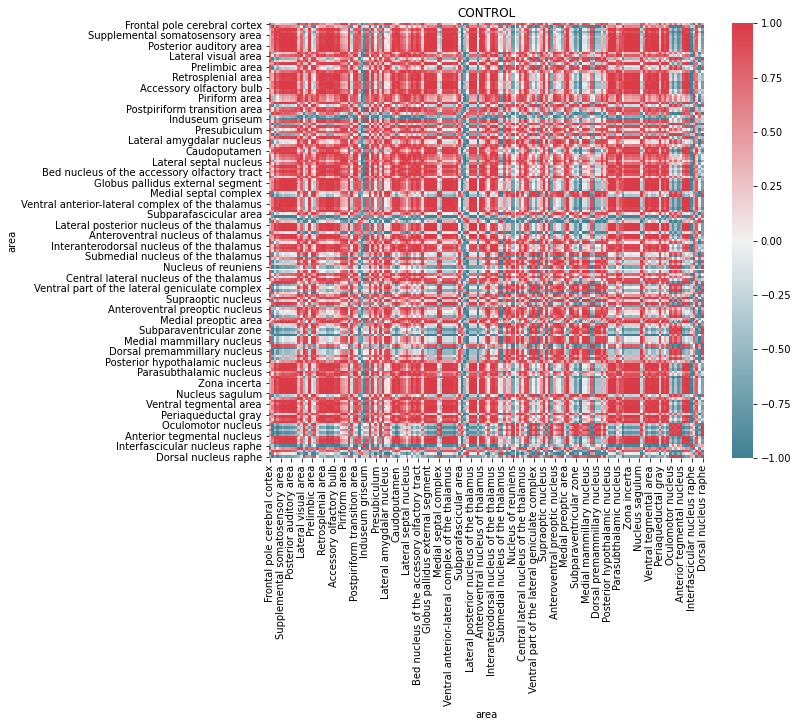

In [72]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

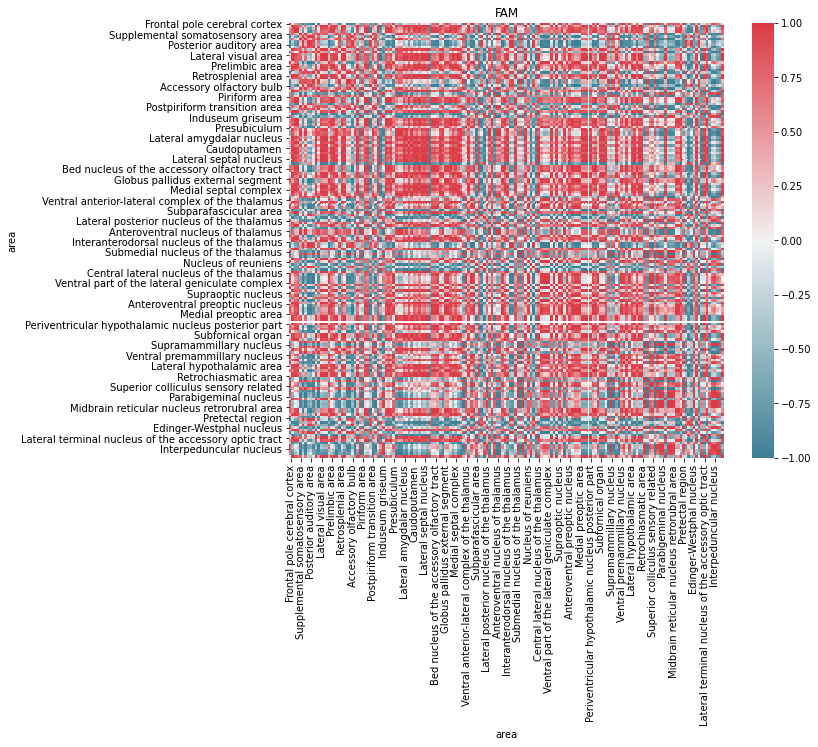

In [73]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

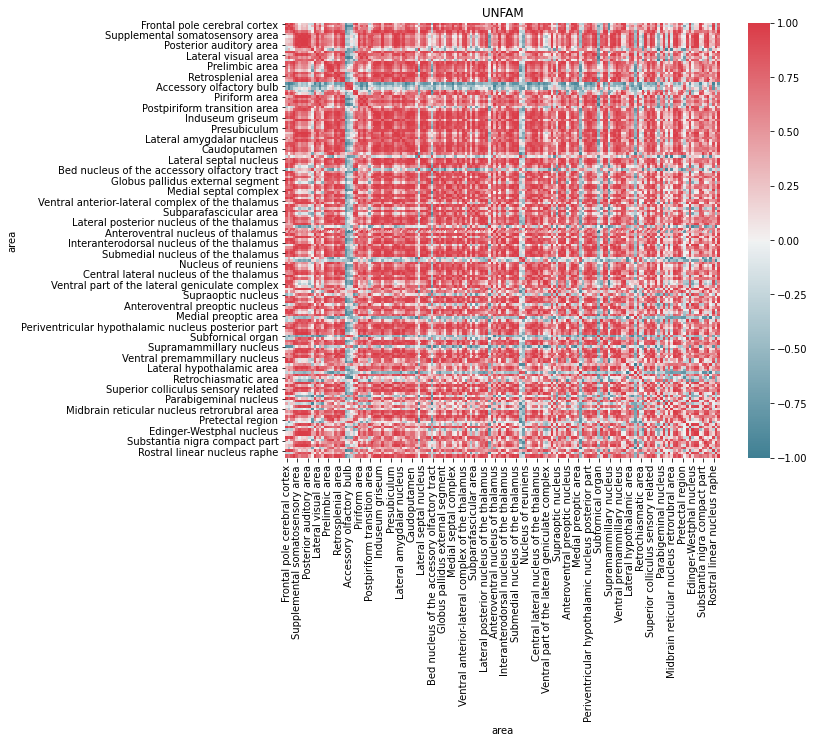

In [74]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# Calculate energy across experimental groups

In [75]:
df_control_energy, df_fam_energy, df_unfam_energy = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='energy')

## T-test on energy across groups

In [76]:
df_ttest_energy = ace.test_across_groups([df_control_energy,df_fam_energy,df_unfam_energy])

In [77]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_energy = df_ttest_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [78]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:10].set_index('area')

,pval_Control_vs_Fam
area,
Ventral premammillary nucleus,3.64243e-06
Cortical amygdalar area,0.00217034
Posterior amygdalar nucleus,0.00312679
Tuberomammillary nucleus,0.00707472
Bed nucleus of the anterior commissure,0.00745957
Arcuate hypothalamic nucleus,0.00868318
Dorsal part of the lateral geniculate complex,0.0099084
Piriform-amygdalar area,0.0107221
Parastrial nucleus,0.0129123


In [79]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:15].set_index('area')

,pval_Control_vs_Unfam
area,
Fundus of striatum,0.0183219
Lateral habenula,0.0430426
Parafascicular nucleus,0.0539375
Pedunculopontine nucleus,0.0627859
Midbrain reticular nucleus retrorubral area,0.0632295
Ventral premammillary nucleus,0.0785232
Central lateral nucleus of the thalamus,0.0868802
Posterior amygdalar nucleus,0.0882254
Parasubthalamic nucleus,0.0978283


In [80]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Paraventricular nucleus of the thalamus,0.0031881
Posterior limiting nucleus of the thalamus,0.0109741
Arcuate hypothalamic nucleus,0.0117136
Intercalated amygdalar nucleus,0.0131365
Medial amygdalar nucleus,0.0198339
Piriform-amygdalar area,0.0209328
Parataenial nucleus,0.0237812
Basomedial amygdalar nucleus,0.0241685
Ventral auditory area,0.0246245


In [81]:
corr_matrix_control_energy = ace.cross_corr(df_control_energy)

In [82]:
corr_matrix_fam_energy = ace.cross_corr(df_fam_energy)

In [83]:
corr_matrix_unfam_energy = ace.cross_corr(df_unfam_energy)

## Plot cross corr matrix across groups per area on energy

Text(0.5, 1.0, 'CONTROL')

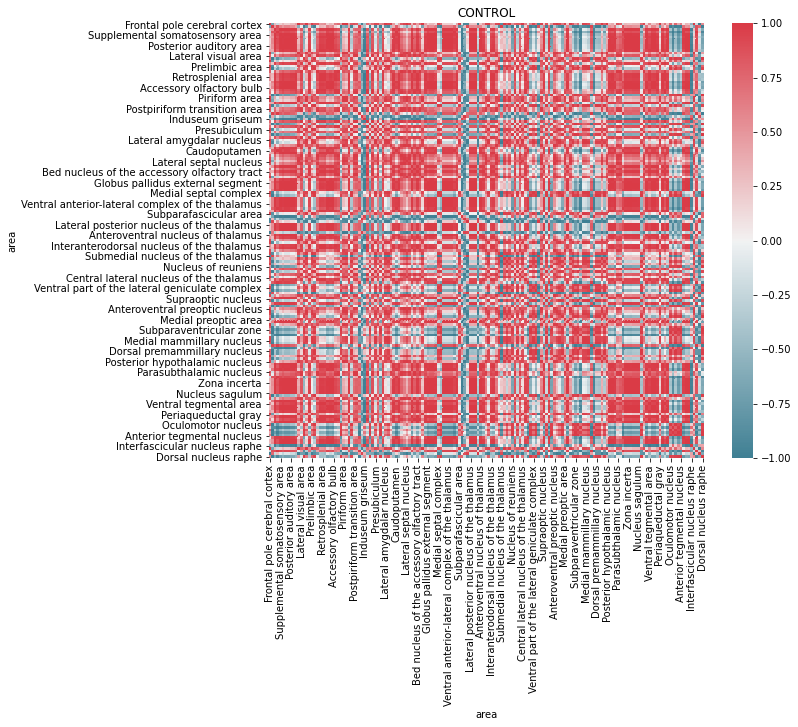

In [84]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

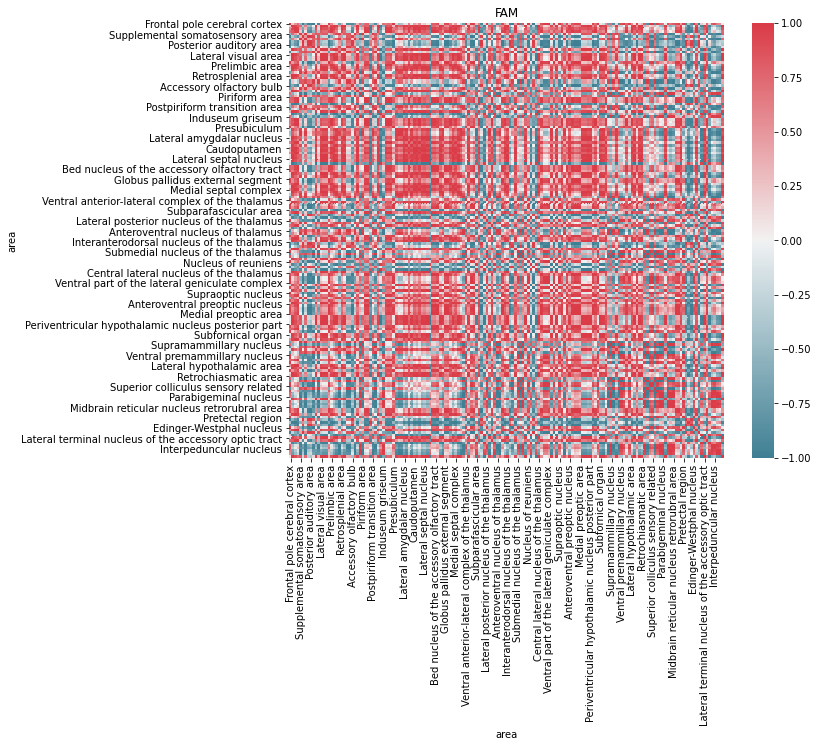

In [85]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

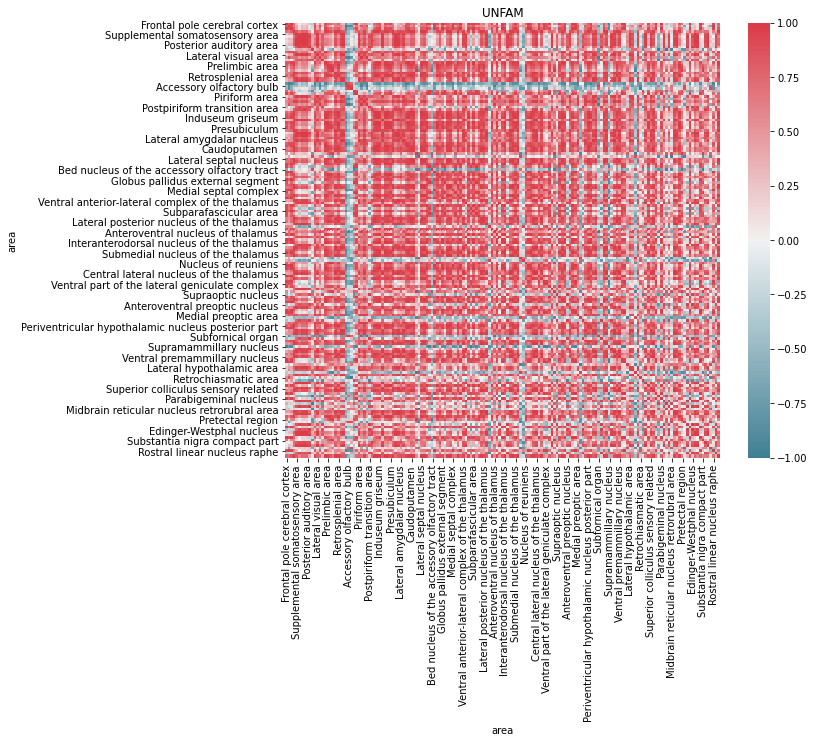

In [86]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# Calculate relative density

In [87]:
df_control_rd, df_fam_rd, df_unfam_rd = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='relative_density')

In [88]:
df_ttest_rd = ace.test_across_groups([df_control_rd,df_fam_rd,df_unfam_rd])

In [89]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_rd = df_ttest_rd.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [90]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Posterior amygdalar nucleus,8.30796e-05
Ventral premammillary nucleus,0.000227054
Medial amygdalar nucleus,0.00153565
Parastrial nucleus,0.0016076
Arcuate hypothalamic nucleus,0.00253133
Ventrolateral preoptic nucleus,0.00295615
Periventricular hypothalamic nucleus posterior part,0.00386789
Bed nucleus of the anterior commissure,0.00641498
Interanterodorsal nucleus of the thalamus,0.00964267


In [91]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Posterior amygdalar nucleus,0.000241502
Ventral premammillary nucleus,0.0133994
Parafascicular nucleus,0.0160425
Medial amygdalar nucleus,0.0175494
Nucleus accumbens,0.0219736
Substantia innominata,0.0284782
Pedunculopontine nucleus,0.029159
Fundus of striatum,0.0330008
Midbrain reticular nucleus retrorubral area,0.0475009


In [92]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Arcuate hypothalamic nucleus,0.00762298
Periaqueductal gray,0.0144738
Mediodorsal nucleus of thalamus,0.0160993
Posterior limiting nucleus of the thalamus,0.0182637
Anterior hypothalamic nucleus,0.0241436
Medial amygdalar nucleus,0.0243282
Anterodorsal nucleus,0.0263537
Interanteromedial nucleus of the thalamus,0.0265318
Anterodorsal preoptic nucleus,0.030763
